In [1]:
!pip install soundfile speechbrain accelerate datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 553.8/553.8 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 518.9/518.9 kB 52.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 62.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 35.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.6/109.6 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.6/485.6 kB 45.0 MB/s eta 0:00:00


In [2]:
!pip install ipython-autotime




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.8 MB/s eta 0:00:00


In [3]:
%load_ext autotime

time: 298 µs (started: 2023-08-01 21:36:20 +00:00)


In [4]:
!pip install -q git+https://github.com/huggingface/transformers.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 52.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 72.7 MB/s eta 0:00:00
time: 28.3 s (started: 2023-08-01 21:36:20 +00:00)


In [5]:
!pip install git+https://github.com/huggingface/accelerate

  Cloning https://github.com/huggingface/accelerate to /tmp/pip-req-build-blt1bqny
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/accelerate /tmp/pip-req-build-blt1bqny
  Resolved https://github.com/huggingface/accelerate to commit 0dec477985584f37e4abde0d6b7f6f47a2a3b9f5
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for accelerate: filename=accelerate-0.22.0.dev0-py3-none-any.whl size=248303 sha256=dae4cb47cdc3a4343029e19520e418bf7f59b2a0a3b7680505bb3c39d345ef4d
  Stored in directory: /tmp/pip-ephem-wheel-cache-evrjiw3h/wheels/f6/c7/9d/1b8a5ca8353d9307733bc719107acb67acdc95063bba749f26
Successfully built accelerate
  Attempting uninstall: accelerate
    Found existing installation: accelerate 0.21.0
    Uninstalling accelerate-0.21.0:
      Successfully uninstalled accelerate-0.21.0
time: 13.7 s (started: 2023-08-01 21:36:49 +00:00)


In [6]:
!nvidia-smi

Tue Aug  1 21:37:02 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   30C    P0    44W / 400W |      0MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [33]:
from huggingface_hub import notebook_login

notebook_login()

In [8]:
from datasets import load_dataset, Audio

dataset = load_dataset("facebook/voxpopuli", "es", split="train")
len(dataset)

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

50922

In [9]:
from transformers import SpeechT5Processor

checkpoint = "microsoft/speecht5_tts"
processor = SpeechT5Processor.from_pretrained(checkpoint)

In [10]:
tokenizer = processor.tokenizer

In [11]:
def extract_all_chars(batch):
    all_text = " ".join(batch["normalized_text"])
    vocab = list(set(all_text))
    return {"vocab": [vocab], "all_text": [all_text]}


vocabs = dataset.map(
    extract_all_chars,
    batched=True,
    batch_size=-1,
    keep_in_memory=True,
    remove_columns=dataset.column_names,
)

dataset_vocab = set(vocabs["vocab"][0])
tokenizer_vocab = {k for k, _ in tokenizer.get_vocab().items()}

Map:   0%|          | 0/50922 [00:00<?, ? examples/s]

In [12]:
dataset_vocab - tokenizer_vocab

{' ', '1', 'á', 'í', 'ñ', 'ó', 'ú', 'ü'}

In [13]:
replacements = [
    ("1", "1"),
    ("á", "a"),
    ("í", "i"),
    ("ñ", "n"),
    ("ó", "o"),
    ("ú", "u"),
    ("ü", "u"),
]


def cleanup_text(inputs):
    for src, dst in replacements:
        inputs["normalized_text"] = inputs["normalized_text"].replace(src, dst)
    return inputs


dataset = dataset.map(cleanup_text)

Map:   0%|          | 0/50922 [00:00<?, ? examples/s]

In [14]:
from collections import defaultdict

speaker_counts = defaultdict(int)

for speaker_id in dataset["speaker_id"]:
    speaker_counts[speaker_id] += 1

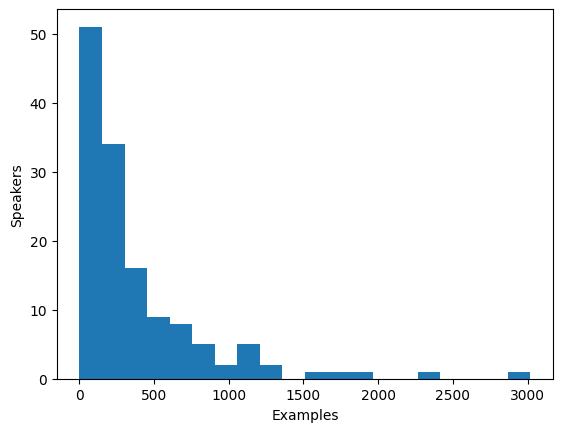

In [15]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(speaker_counts.values(), bins=20)
plt.ylabel("Speakers")
plt.xlabel("Examples")
plt.show()

In [16]:
def select_speaker(speaker_id):
    return 100 <= speaker_counts[speaker_id] <= 400


dataset = dataset.filter(select_speaker, input_columns=["speaker_id"])

Filter:   0%|          | 0/50922 [00:00<?, ? examples/s]

In [17]:
len(set(dataset["speaker_id"]))

60

In [18]:
len(dataset)

13154

In [19]:
import os
import torch
from speechbrain.pretrained import EncoderClassifier

spk_model_name = "speechbrain/spkrec-xvect-voxceleb"

device = "cuda" if torch.cuda.is_available() else "cpu"
speaker_model = EncoderClassifier.from_hparams(
    source=spk_model_name,
    run_opts={"device": device},
    savedir=os.path.join("/tmp", spk_model_name),
)


def create_speaker_embedding(waveform):
    with torch.no_grad():
        speaker_embeddings = speaker_model.encode_batch(torch.tensor(waveform))
        speaker_embeddings = torch.nn.functional.normalize(speaker_embeddings, dim=2)
        speaker_embeddings = speaker_embeddings.squeeze().cpu().numpy()
    return speaker_embeddings

In [20]:
def prepare_dataset(example):
    audio = example["audio"]

    example = processor(
        text=example["normalized_text"],
        audio_target=audio["array"],
        sampling_rate=audio["sampling_rate"],
        return_attention_mask=False,
    )

    # strip off the batch dimension
    example["labels"] = example["labels"][0]

    # use SpeechBrain to obtain x-vector
    example["speaker_embeddings"] = create_speaker_embedding(audio["array"])

    return example

In [21]:
processed_example = prepare_dataset(dataset[0])
list(processed_example.keys())

['input_ids', 'labels', 'speaker_embeddings']

In [22]:
processed_example["speaker_embeddings"].shape

(512,)

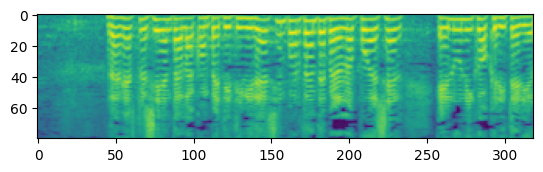

In [23]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(processed_example["labels"].T)
plt.show()

In [24]:
dataset = dataset.map(prepare_dataset, remove_columns=dataset.column_names)

Map:   0%|          | 0/13154 [00:00<?, ? examples/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (649 > 600). Running this sequence through the model will result in indexing errors


In [25]:
def is_not_too_long(input_ids):
    input_length = len(input_ids)
    return input_length < 200


dataset = dataset.filter(is_not_too_long, input_columns=["input_ids"])
len(dataset)

Filter:   0%|          | 0/13154 [00:00<?, ? examples/s]

8227

In [26]:
dataset = dataset.train_test_split(test_size=0.1)

In [27]:
from dataclasses import dataclass
from typing import Any, Dict, List, Union


@dataclass
class TTSDataCollatorWithPadding:
    processor: Any

    def __call__(
        self, features: List[Dict[str, Union[List[int], torch.Tensor]]]
    ) -> Dict[str, torch.Tensor]:
        input_ids = [{"input_ids": feature["input_ids"]} for feature in features]
        label_features = [{"input_values": feature["labels"]} for feature in features]
        speaker_features = [feature["speaker_embeddings"] for feature in features]

        # collate the inputs and targets into a batch
        batch = processor.pad(
            input_ids=input_ids, labels=label_features, return_tensors="pt"
        )

        # replace padding with -100 to ignore loss correctly
        batch["labels"] = batch["labels"].masked_fill(
            batch.decoder_attention_mask.unsqueeze(-1).ne(1), -100
        )

        # not used during fine-tuning
        del batch["decoder_attention_mask"]

        # round down target lengths to multiple of reduction factor
        if model.config.reduction_factor > 1:
            target_lengths = torch.tensor(
                [len(feature["input_values"]) for feature in label_features]
            )
            target_lengths = target_lengths.new(
                [
                    length - length % model.config.reduction_factor
                    for length in target_lengths
                ]
            )
            max_length = max(target_lengths)
            batch["labels"] = batch["labels"][:, :max_length]

        # also add in the speaker embeddings
        batch["speaker_embeddings"] = torch.tensor(speaker_features)

        return batch

In [28]:
data_collator = TTSDataCollatorWithPadding(processor=processor)

In [29]:
from transformers import SpeechT5ForTextToSpeech

model = SpeechT5ForTextToSpeech.from_pretrained(checkpoint)

In [30]:
from functools import partial

# disable cache during training since it's incompatible with gradient checkpointing
model.config.use_cache = False

# set language and task for generation and re-enable cache
model.generate = partial(model.generate, use_cache=True)

In [31]:
from transformers import Seq2SeqTrainingArguments

training_args = Seq2SeqTrainingArguments(
    output_dir="speecht5_finetuned_voxpopuli_es_20k_steps_16_batch_size",  # change to a repo name of your choice
    per_device_train_batch_size=16,
    gradient_accumulation_steps=1,
    learning_rate=3e-5,
    warmup_steps=100,
    max_steps=20000,
    gradient_checkpointing=True,
    fp16=True,
    evaluation_strategy="steps",
    per_device_eval_batch_size=4,
    save_steps=5000,
    eval_steps=5000,
    logging_steps=5000,
    report_to=["tensorboard"],
    load_best_model_at_end=True,
    greater_is_better=False,
    label_names=["labels"],
    push_to_hub=True,
)

In [34]:
from transformers import Seq2SeqTrainer

trainer = Seq2SeqTrainer(
    args=training_args,
    model=model,
    train_dataset=dataset["train"],
    eval_dataset=dataset["test"],
    data_collator=data_collator,
    tokenizer=processor,
)

Cloning https://huggingface.co/DrishtiSharma/speecht5_finetuned_voxpopuli_es_20k_steps_16_batch_size into local empty directory.


In [35]:
trainer.train()

Step,Training Loss,Validation Loss
5000,0.483100,0.434173
10000,0.448000,0.429420
15000,0.438100,0.430448
20000,0.432600,0.430657


TrainOutput(global_step=20000, training_loss=0.45046217041015624, metrics={'train_runtime': 9807.0186, 'train_samples_per_second': 32.63, 'train_steps_per_second': 2.039, 'total_flos': 5.222266407269366e+16, 'train_loss': 0.45046217041015624, 'epoch': 43.2})

In [36]:
trainer.push_to_hub()

Several commits (2) will be pushed upstream.
The progress bars may be unreliable.


Upload file pytorch_model.bin:   0%|          | 1.00/551M [00:00<?, ?B/s]

Upload file runs/Aug01_22-05-37_7955ca5d509e/events.out.tfevents.1690927659.7955ca5d509e.277.0:   0%|         …

To https://huggingface.co/DrishtiSharma/speecht5_finetuned_voxpopuli_es_20k_steps_16_batch_size
   0ce2b46..17110d9  main -> main

   0ce2b46..17110d9  main -> main

To https://huggingface.co/DrishtiSharma/speecht5_finetuned_voxpopuli_es_20k_steps_16_batch_size
   17110d9..c5e2be9  main -> main

   17110d9..c5e2be9  main -> main



'https://huggingface.co/DrishtiSharma/speecht5_finetuned_voxpopuli_es_20k_steps_16_batch_size/commit/17110d954a42f3a999f8c3ee28e6e9da6f4eaf18'

In [37]:
model = SpeechT5ForTextToSpeech.from_pretrained("DrishtiSharma/speecht5_finetuned_voxpopuli_es_20k_steps_16_batch_size")

In [38]:
example = dataset["test"][304]
speaker_embeddings = torch.tensor(example["speaker_embeddings"]).unsqueeze(0)
speaker_embeddings.shape

torch.Size([1, 512])

In [39]:
text = "Hola! Mi nombre es Drishti. Amo a mi familia"

In [40]:
tokenizer.decode(tokenizer(text)["input_ids"])

'Hola! Mi nombre es Drishti. Amo a mi familia</s>'

In [41]:
inputs = processor(text=text, return_tensors="pt")

In [42]:
spectrogram = model.generate_speech(inputs["input_ids"], speaker_embeddings)

In [43]:
spectrogram

tensor([[-1.9266, -1.8639, -1.8148,  ..., -3.0502, -3.1156, -3.1467],
        [-1.8655, -1.7921, -1.7561,  ..., -3.1081, -3.1346, -3.2117],
        [-1.9720, -1.9287, -1.8430,  ..., -3.1295, -3.2189, -3.3806],
        ...,
        [-0.7356, -0.8663, -1.2750,  ..., -2.2614, -2.3730, -2.4713],
        [-0.8853, -0.9824, -1.3029,  ..., -2.2442, -2.3445, -2.4778],
        [-1.0460, -1.1421, -1.3996,  ..., -2.2813, -2.3693, -2.4980]])

In [44]:
from transformers import SpeechT5HifiGan
vocoder = SpeechT5HifiGan.from_pretrained("microsoft/speecht5_hifigan")

In [45]:
with torch.no_grad():
    speech = vocoder(spectrogram)

In [46]:
from IPython.display import Audio
Audio(speech.numpy(), rate=16000)